# Credit Card Fraud Detection: An Exploratory Data Analysis
<center>R Abhijit Srivathsan - 2448044</center>

### 1. Dataset Selection & Justification of Relevance

**Dataset:** Credit Card Fraud Detection Dataset from Kaggle.

**Societal Relevance (Justification):**
This project addresses the critical real-world problem of financial fraud, which has significant societal implications:

1.  **Protecting Consumers:** It directly contributes to the financial security of individuals by creating methods to prevent unauthorized transactions, protecting them from theft and the stress of financial recovery.
2.  **Maintaining Economic Stability:** By reducing fraud, we enhance trust in digital payment systems. This trust is fundamental for the functioning of e-commerce and the modern digital economy.
3.  **Technical Challenge with a Cause:** The dataset is highly imbalanced (far more non-fraudulent transactions than fraudulent ones). Developing a model that can accurately identify rare fraud events is a significant technical challenge that serves a clear social good. Successfully tackling this demonstrates advanced data science skills applied to a meaningful problem.

### 2. Exploratory Data Analysis (EDA)

This section involves loading the data, inspecting its structure, and creating visualizations to understand the underlying patterns, especially concerning fraudulent transactions.

#### Step 2.1: Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set a style for the plots
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

print('Libraries imported successfully!')

Libraries imported successfully!


In [2]:
# Load the dataset
# Make sure the 'creditcard.csv' file is in the same directory or provide the correct path.
df = pd.read_csv('creditcard.csv')

# Display the first 5 rows to get a feel for the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Step 2.2: Initial Data Inspection

Let's check the basic properties of the dataset, such as the number of rows and columns, data types, and presence of any missing values.

In [3]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Check for any missing values
df.isnull().sum().any()

np.False_

**Interpretation:**
The dataset contains **284,807 transactions** with **31 columns**. All columns are numerical (`float64` or `int64`). Importantly, there are **no missing values**, so we don't need to perform data imputation. The features `V1` through `V28` are the result of a PCA transformation to anonymize user data.

#### Step 2.3: Analyzing the Target Variable ('Class')

The 'Class' column is our target variable, where `1` indicates a fraudulent transaction and `0` indicates a legitimate one. Let's see its distribution.

In [5]:
class_counts = df['Class'].value_counts()
print("Class Distribution:")
print(class_counts)

# Visualize the class distribution
fig = px.pie(values=class_counts.values,
            names=['Legitimate (0)', 'Fraud (1)'], 
            title='Distribution of Transaction Classes',
            color_discrete_sequence=['skyblue', 'red'])
fig.update_traces(textinfo='percent+label', pull=[0, 0.1])
fig.show()

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


**Interpretation: Severe Class Imbalance**

The pie chart clearly shows a massive imbalance in the dataset. Only **0.173%** of all transactions are fraudulent. This is a critical insight, as it means any model trained on this data could achieve high accuracy simply by always predicting "not fraudulent." Therefore, for model evaluation, we will need to use metrics other than accuracy, such as Precision, Recall, or the AUPRC.

#### Step 2.4: Analyzing Transaction 'Amount' and 'Time'

In [6]:
# Get summary statistics for the 'Amount' column
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

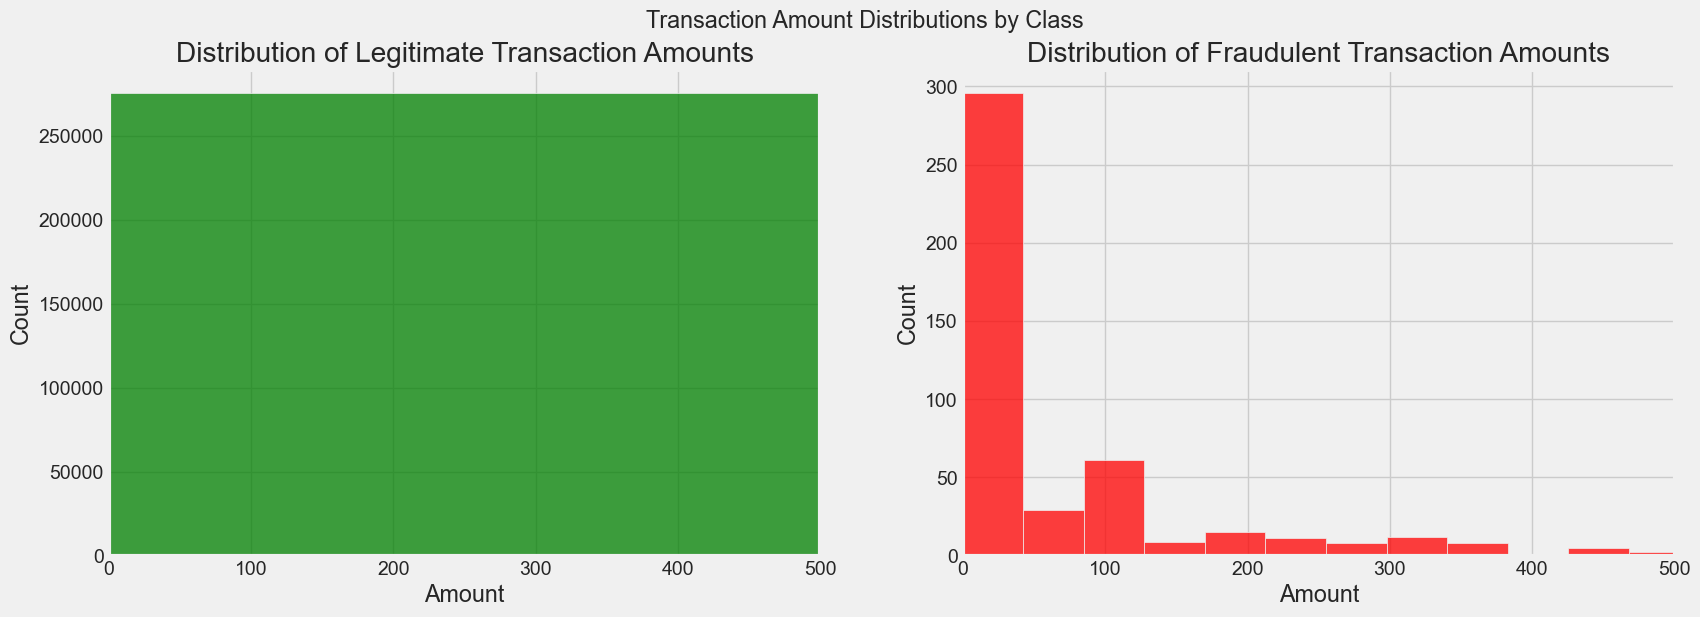

In [7]:
# Visualize the distribution of transaction amounts for both classes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, ax=ax1, color='green')
ax1.set_title('Distribution of Legitimate Transaction Amounts')
ax1.set_xlabel('Amount')
ax1.set_xlim(0, 500) # Limit x-axis for better visibility

sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, ax=ax2, color='red')
ax2.set_title('Distribution of Fraudulent Transaction Amounts')
ax2.set_xlabel('Amount')
ax2.set_xlim(0, 500) # Limit x-axis for better visibility

plt.suptitle('Transaction Amount Distributions by Class')
plt.show()

**Interpretation: Transaction Amount**

The histograms show that **fraudulent transactions tend to involve smaller amounts** compared to legitimate transactions. While there are many high-value legitimate transactions, fraudulent transactions seem to be clustered at the lower end of the value scale. This could be a tactic used by fraudsters to avoid immediate detection.

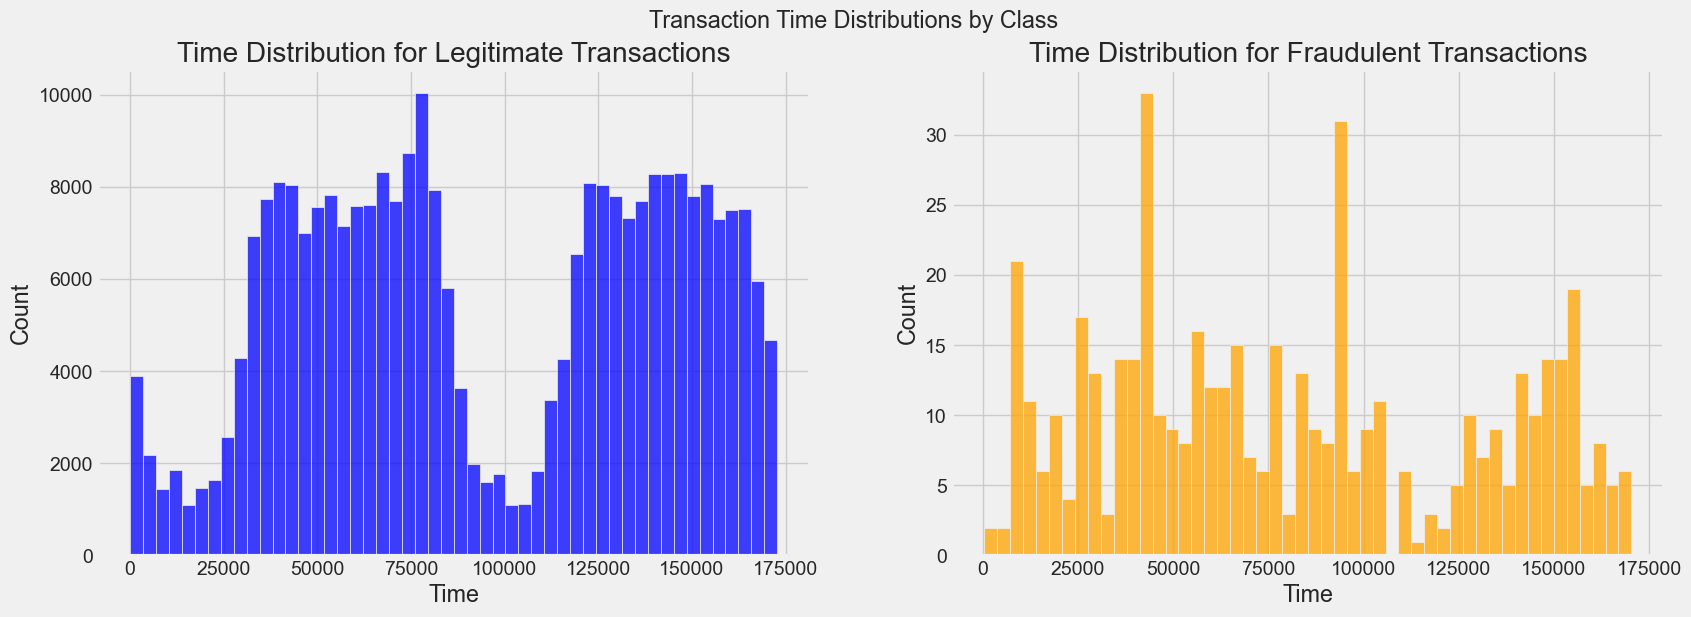

In [8]:
# Visualize the distribution of transactions over 'Time'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(df[df['Class'] == 0]['Time'], bins=50, ax=ax1, color='blue')
ax1.set_title('Time Distribution for Legitimate Transactions')

sns.histplot(df[df['Class'] == 1]['Time'], bins=50, ax=ax2, color='orange')
ax2.set_title('Time Distribution for Fraudulent Transactions')

plt.suptitle('Transaction Time Distributions by Class')
plt.show()

**Interpretation: Transaction Time**

The 'Time' feature represents seconds elapsed since the first transaction. The distributions for legitimate transactions show clear dips, which likely correspond to nighttime hours. In contrast, the distribution for **fraudulent transactions is more evenly spread**, suggesting that fraud happens around the clock without a clear diurnal pattern.

#### Step 2.5: Analyzing Correlations of PCA Features

Let's see which of the PCA components (`V1`-`V28`) are most correlated with our 'Class' variable.

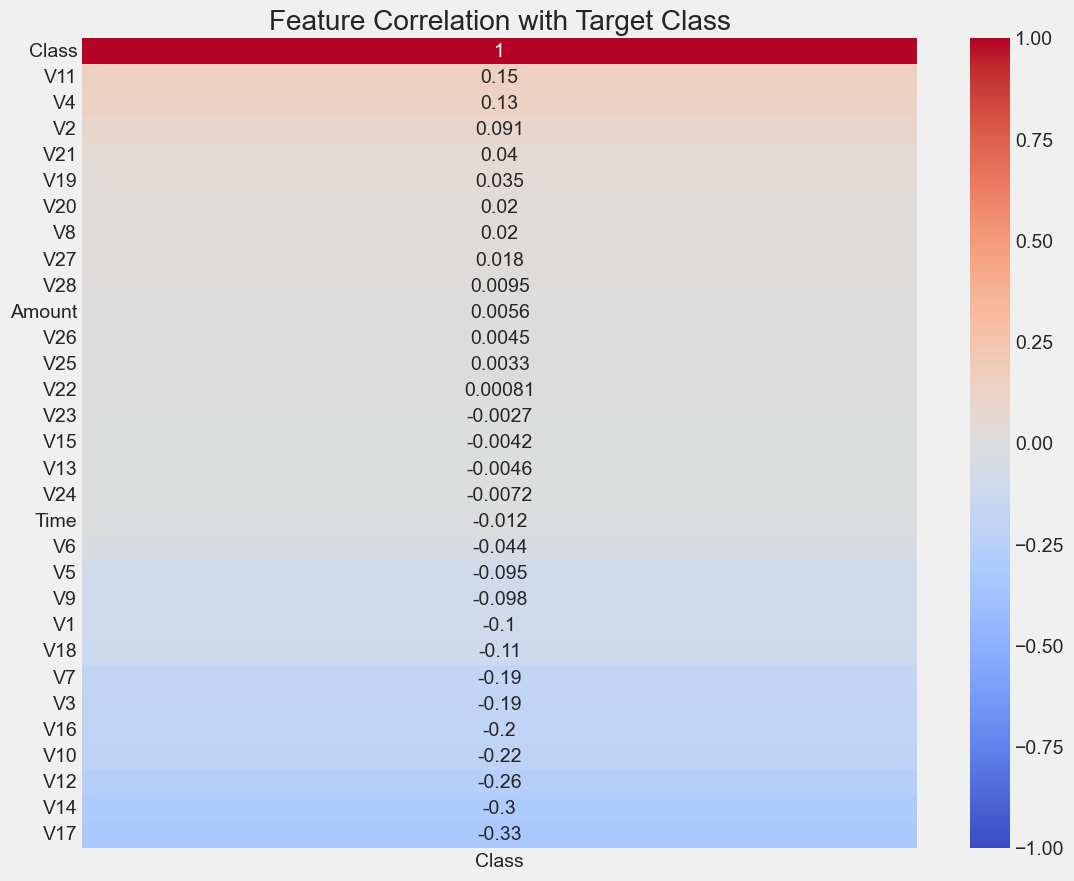

In [9]:
# Calculate the correlation matrix
corr = df.corr()

# Plot a heatmap focusing on correlations with the 'Class' variable
plt.figure(figsize=(12, 10))
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), 
            vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Target Class')
plt.show()

**Interpretation: Feature Correlations**

The heatmap reveals several important correlations:
* **Negative Correlation:** Features like `V17`, `V14`, `V12`, and `V10` show strong negative correlations with the 'Class' variable. This means that lower values in these features are associated with a higher probability of fraud.
* **Positive Correlation:** Features like `V11`, `V4`, and `V2` show positive correlations, meaning higher values in these features are associated with fraud.

These features will be highly important for a machine learning model to distinguish between the two classes.

### 3. Conclusion of EDA

This exploratory data analysis has provided several key insights that will be crucial for the model-building phase:

1.  The dataset is **highly imbalanced**, which necessitates the use of appropriate evaluation metrics (like AUPRC) and sampling techniques (like SMOTE or ADASYN).
2.  The `Amount` and `Time` features show different distributions for fraudulent and legitimate transactions, but they also have very different scales. They will need to be **scaled** (e.g., using StandardScaler) before being fed into a deep learning model.
3.  Several anonymized PCA features (`V17`, `V14`, `V12`, `V11`, etc.) are strongly correlated with fraud and will be the most predictive features for our model.